In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
maindf = yf.download('BTC-USD')


[*********************100%***********************]  1 of 1 completed


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#chainging dtaset to simulate diffrent days
goBack = 0

maindf = maindf[:len(maindf) - goBack]
maindf.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-10,17134.220703,17216.826172,17120.683594,17128.724609,17128.724609,12706781969
2022-12-11,17129.710938,17245.634766,17091.820312,17104.193359,17104.193359,14122486832
2022-12-12,17102.500000,17212.564453,16899.394531,17206.437500,17206.437500,19617581341
2022-12-13,17206.441406,17930.085938,17111.763672,17781.318359,17781.318359,26634741631
2022-12-15,17817.437500,17846.744141,17652.097656,17655.722656,17655.722656,25899763712


In [ ]:
testSize = 30
trainSize = 365
#trainSize = len(maindf) - testSize

maindf = maindf[len(maindf) - trainSize - testSize:len(maindf)]

Total number of days present in the Main dataset:  395
Total number of fields present in the Main dataset:  6


Total number of days present in the dataset:  395
Total number of fields present in the dataset:  1
                   Close
Date                    
2022-12-10  17128.724609
2022-12-11  17104.193359
2022-12-12  17206.437500
2022-12-13  17781.318359
2022-12-15  17655.722656


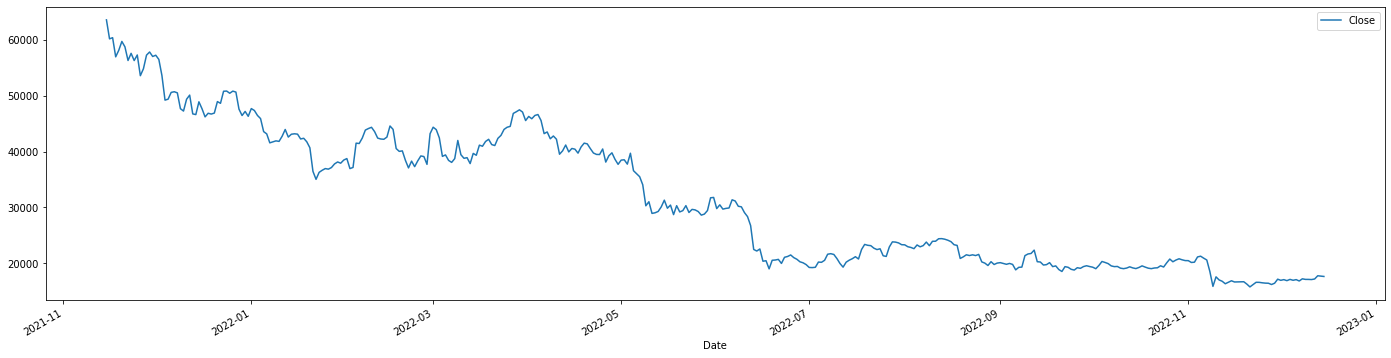

In [ ]:
#SHAPE of the dataset
print('Total number of days present in the Main dataset: ',maindf.shape[0]) #rows
print('Total number of fields present in the Main dataset: ',maindf.shape[1]) #cols
#print('\n',maindf.info())

df = maindf[['Close']] # we are only interested in the closing price
print('\n\nTotal number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])
#print('\n',df.info())

df.plot(figsize = (24,6))

print(df.tail())

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#results = seasonal_decompose(df['Close'])
#results.plot();

In [ ]:
train = df.iloc[ : trainSize]
test = df.iloc[trainSize : ]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
#scaled_test = scaler.transform(test)


In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator
#n_input = 3
#n_features = 1
#generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
#X,y = generator[0]
#print(f'Given the Array: \n{X.flatten()}')
#print(f'Predict this y: \n {y}')

In [ ]:
#X.shape

In [ ]:
n_input = 15 #lookback
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

print(generator[0])
print(len(generator))

(array([[[1.        ],
        [0.92875771],
        [0.9330945 ],
        [0.86123872],
        [0.88593488],
        [0.91902451],
        [0.89874813],
        [0.84754561],
        [0.87438837],
        [0.8473597 ],
        [0.86821362],
        [0.79050514],
        [0.81662486],
        [0.86766361],
        [0.87936964]]]), array([[0.86256617]]))
350


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model

n_features = 1
model = Sequential()

model.add(LSTM(20, return_sequences=True,input_shape=(n_input, n_features))) #n_input = 15, n_features = 1 
model.add(LSTM(40, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 20)            1760      
                                                                 
 lstm_1 (LSTM)               (None, 40)                9760      
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(len(generator))

350


In [ ]:
# fit model
model.fit(generator,epochs= 30)

Epoch 1/30
350/350 [==============================] - 11s 18ms/step - loss: 0.0085
Epoch 2/30
350/350 [==============================] - 9s 24ms/step - loss: 0.0031
Epoch 3/30
350/350 [==============================] - 4s 12ms/step - loss: 0.0027
Epoch 4/30
350/350 [==============================] - 4s 12ms/step - loss: 0.0027
Epoch 5/30
350/350 [==============================] - 4s 12ms/step - loss: 0.0021
Epoch 6/30
350/350 [==============================] - 4s 12ms/step - loss: 0.0019
Epoch 7/30
350/350 [==============================] - 4s 12ms/step - loss: 0.0016
Epoch 8/30
350/350 [==============================] - 4s 12ms/step - loss: 0.0014
Epoch 9/30
350/350 [==============================] - 4s 12ms/step - loss: 0.0012
Epoch 10/30
350/350 [==============================] - 4s 12ms/step - loss: 0.0012
Epoch 11/30
350/350 [==============================] - 5s 15ms/step - loss: 0.0011
Epoch 12/30
350/350 [==============================] - 4s 12ms/step - loss: 0.0010
Epoch 13/30


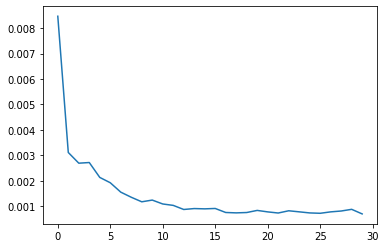

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-n_input:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input : ]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
print(current_batch)
for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

[[[0.09679687]
  [0.09657664]
  [0.08974381]
  [0.09080269]
  [0.11046081]
  [0.11330203]
  [0.10583083]
  [0.09904204]
  [0.0558023 ]
  [0.        ]
  [0.0357822 ]
  [0.02419428]
  [0.01926303]
  [0.0099122 ]
  [0.01546695]]]
1/1 [==============================] - 0s 22ms/step


In [ ]:
test_predictions

[array([0.0083165], dtype=float32),
 array([0.00482823], dtype=float32),
 array([0.00125049], dtype=float32),
 array([-0.00229318], dtype=float32),
 array([-0.00580478], dtype=float32),
 array([-0.00930209], dtype=float32),
 array([-0.01275704], dtype=float32),
 array([-0.01613833], dtype=float32),
 array([-0.01942571], dtype=float32),
 array([-0.02254806], dtype=float32),
 array([-0.02545456], dtype=float32),
 array([-0.02824531], dtype=float32),
 array([-0.03087966], dtype=float32),
 array([-0.03336914], dtype=float32),
 array([-0.03571288], dtype=float32),
 array([-0.03793674], dtype=float32),
 array([-0.04003481], dtype=float32),
 array([-0.04201744], dtype=float32),
 array([-0.04389081], dtype=float32),
 array([-0.04566101], dtype=float32),
 array([-0.04733356], dtype=float32),
 array([-0.04891355], dtype=float32),
 array([-0.0504057], dtype=float32),
 array([-0.05181439], dtype=float32),
 array([-0.05314373], dtype=float32),
 array([-0.05439778], dtype=float32),
 array([-0.055580

In [ ]:
test.head()

,Close
Date,
2022-11-15,16884.613281
2022-11-16,16669.439453
2022-11-17,16687.517578
2022-11-18,16697.777344
2022-11-19,16711.546875


In [ ]:
train.tail()

,Close
Date,
2022-11-10,17586.771484
2022-11-11,17034.292969
2022-11-12,16799.185547
2022-11-13,16353.365234
2022-11-14,16618.199219


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
print(true_predictions)

[[16277.2867158 ]
 [16110.97603442]
 [15940.39984717]
 [15771.44791255]
 [15604.02503106]
 [15437.28382061]
 [15272.56169205]
 [15111.35164348]
 [14954.61916832]
 [14805.75415018]
 [14667.18097928]
 [14534.12582705]
 [14408.52785042]
 [14289.83681052]
 [14178.09426831]
 [14072.06689298]
 [13972.03708603]
 [13877.51108887]
 [13788.19406723]
 [13703.79615996]
 [13624.05379232]
 [13548.72434769]
 [13477.58332574]
 [13410.42079029]
 [13347.04172444]
 [13287.2525322 ]
 [13230.86849812]
 [13177.7134321 ]
 [13127.61931412]
 [13080.42558383]]


In [ ]:
test['Predictions'] = true_predictions

<ipython-input-30-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
train.tail()

,Close
Date,
2022-11-10,17586.771484
2022-11-11,17034.292969
2022-11-12,16799.185547
2022-11-13,16353.365234
2022-11-14,16618.199219


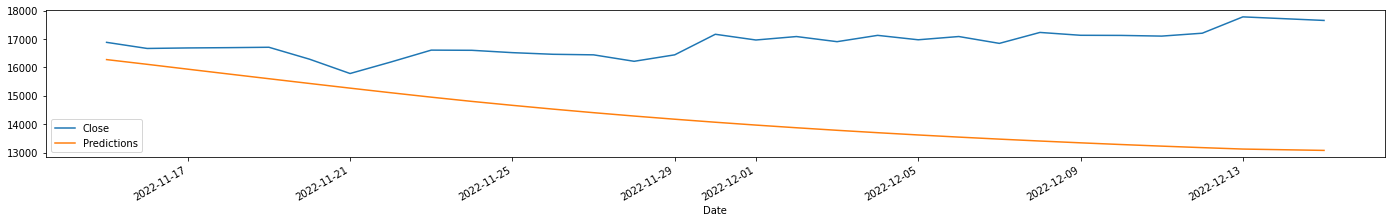

In [ ]:
test.plot(figsize=(24,3))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Close'],test['Predictions']))
print(rmse)

2796.593959594318
